In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def generalized_linear_regression(X, Y, dY):
    """
    Generalized (weighted) linear regression with intercept.

    Model:
        Y = beta0 + beta1 * X + eps
        Cov(eps) = sigma^2 * D, where D = diag(dY^2)
    """

    X = np.asarray(X)
    Y = np.asarray(Y)
    dY = np.asarray(dY)
    n = len(Y)

    # Design matrix with intercept
    A = np.vstack([np.ones_like(X), X]).T  # n x 2

    # Weight matrix D^{-1}
    W = np.diag(1.0 / dY**2)

    # Fit parameters
    cov_beta = np.linalg.inv(A.T @ W @ A)
    beta_hat = cov_beta @ (A.T @ W @ Y)
    beta0, beta1 = beta_hat

    # residuals
    residuals = Y - A @ beta_hat

    # sigma^2_hat
    p = 2
    sigma2_hat = (residuals.T @ W @ residuals) / (n - p)

    # standard errors
    sde = np.sqrt(np.diag(cov_beta) * sigma2_hat)
    sde_beta0, sde_beta1 = sde

    # Weighted R^2
    Y_mean = np.average(Y, weights=1/dY**2)
    ss_tot = np.sum(((Y - Y_mean)**2) / dY**2)
    ss_res = np.sum((residuals**2) / dY**2)
    R2 = 1 - ss_res / ss_tot

    # Reduced chi^2
    chi2_red = ss_res / (n - p)

    # --- Plot ---
    fig, ax = plt.subplots()
    ax.errorbar(X, Y, yerr=dY, fmt='o', label='data')
    xfit = np.linspace(np.min(X), np.max(X), 200)
    yfit = beta0 + beta1 * xfit
    ax.plot(xfit, yfit, 'r-', label='fit')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.set_title('Weighted Linear Fit')
    fig.tight_layout()

    # Prediction function with uncertainty
    def predict(x_new):
        x_new = np.asarray(x_new)
        A_new = np.vstack([np.ones_like(x_new), x_new]).T
        y_pred = A_new @ beta_hat
        pred_var = sigma2_hat * np.sum(A_new @ cov_beta * A_new, axis=1)
        pred_err = np.sqrt(pred_var)
        return y_pred, pred_err

    # return results + fig handle
    return {
        "beta0": beta0,
        "beta1": beta1,
        "sde_beta0": sde_beta0,
        "sde_beta1": sde_beta1,
        "sigma2_hat": sigma2_hat,
        "R2": R2,
        "chi2_red": chi2_red,
        "predict": predict,
        "fig": fig,
        "ax":ax
    }


In [12]:
df = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.2397_0015.2398_0015.2399_0015.2400.csv")


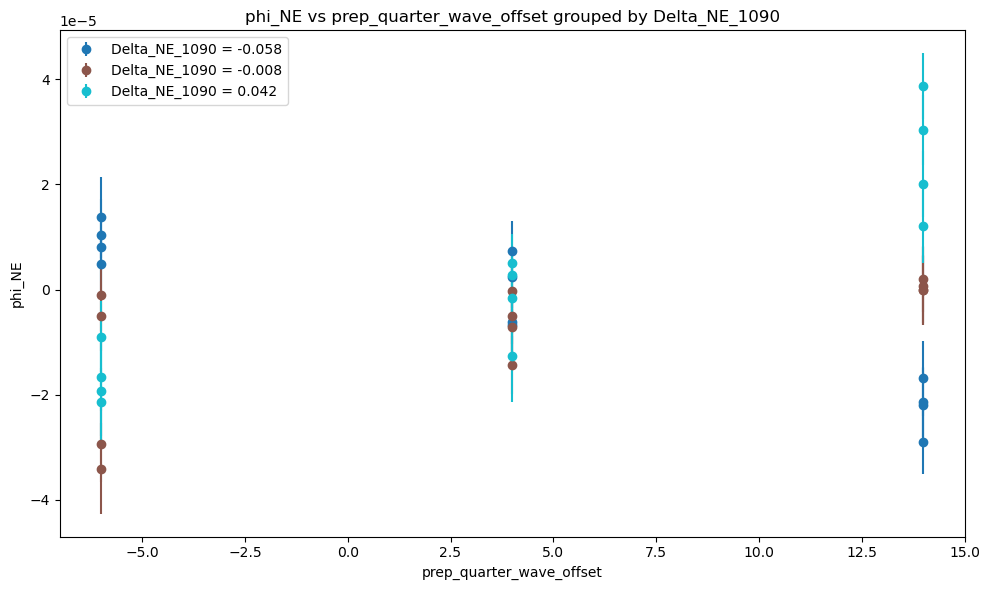

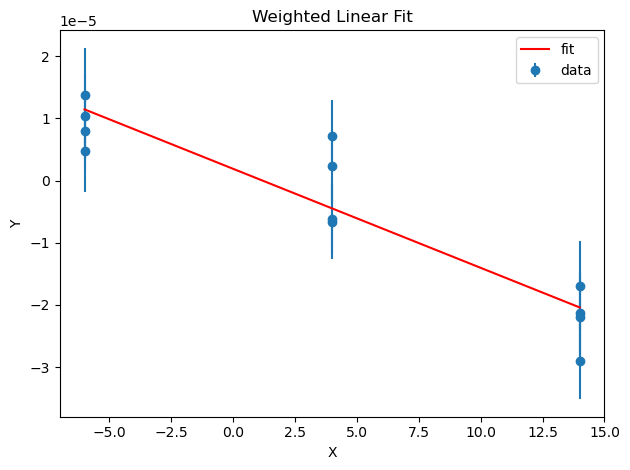

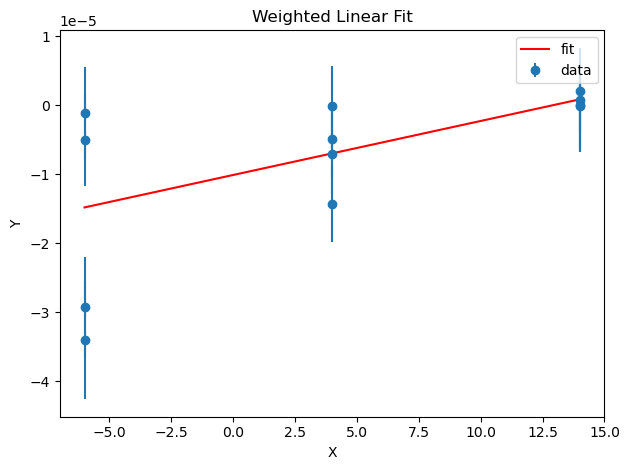

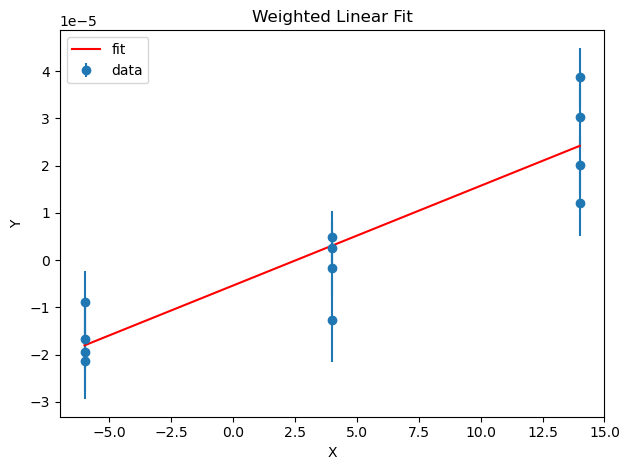


Weighted Linear Regression Results:

Delta_NE_1090 = -0.058
  beta0       = 0.000002 ± 0.000002
  beta1       = -0.000002 ± 0.000000
  R^2         = 0.825147
  chi2_red    = 0.950133

Delta_NE_1090 = -0.008
  beta0       = -0.000010 ± 0.000003
  beta1       = 0.000001 ± 0.000000
  R^2         = 0.354562
  chi2_red    = 1.865519

Delta_NE_1090 = 0.042
  beta0       = -0.000005 ± 0.000003
  beta1       = 0.000002 ± 0.000000
  R^2         = 0.829798
  chi2_red    = 1.580624



In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ===========================================================
# YOU DECIDE THESE VARIABLES
# ===========================================================
y = "phi_NE"                          # dependent variable
dy = "uncertainty_phi_NE"             # uncertainty on y
fit_against = "prep_quarter_wave_offset"   # x variable
master_parameter = "Delta_NE_1090"    # grouping parameter
# ===========================================================


# Get unique parameter groups
groups = np.sort(df[master_parameter].unique())

# Color map for groups
colors = plt.cm.tab10(np.linspace(0, 1, len(groups)))

# Make the figure
fig, ax = plt.subplots(figsize=(10, 6))

fit_results = {}

for i, g in enumerate(groups):

    sub = df[df[master_parameter] == g]

    X = sub[fit_against].values
    Y = sub[y].values
    dY = sub[dy].values

    color = colors[i]

    # --- ERROR BAR PLOT ONLY ---
    ax.errorbar(
        X, Y, yerr=dY,
        fmt='o', markersize=6, color=color,
        label=f"{master_parameter} = {g}"
    )

    # --- DO WEIGHTED FIT ---
    res = generalized_linear_regression(X, Y, dY)
    fit_results[g] = res


# --- Plot formatting ---
ax.set_xlabel(fit_against)
ax.set_ylabel(y)
ax.set_title(f"{y} vs {fit_against} grouped by {master_parameter}")
ax.legend()
fig.tight_layout()

plt.show()


# ===========================================================
# PRINT FIT RESULTS
# ===========================================================
print("\nWeighted Linear Regression Results:\n")

for g in groups:
    r = fit_results[g]
    print(f"{master_parameter} = {g}")
    print(f"  beta0       = {r['beta0']:.6f} ± {r['sde_beta0']:.6f}")
    print(f"  beta1       = {r['beta1']:.6f} ± {r['sde_beta1']:.6f}")
    print(f"  R^2         = {r['R2']:.6f}")
    print(f"  chi2_red    = {r['chi2_red']:.6f}")
    print("")


In [14]:
df = pd.read_csv(r"C:\ACME_analysis\multiple_results\sequencedf_result\0015.2403_0015.2404_0015.2405_0015.2406.csv")

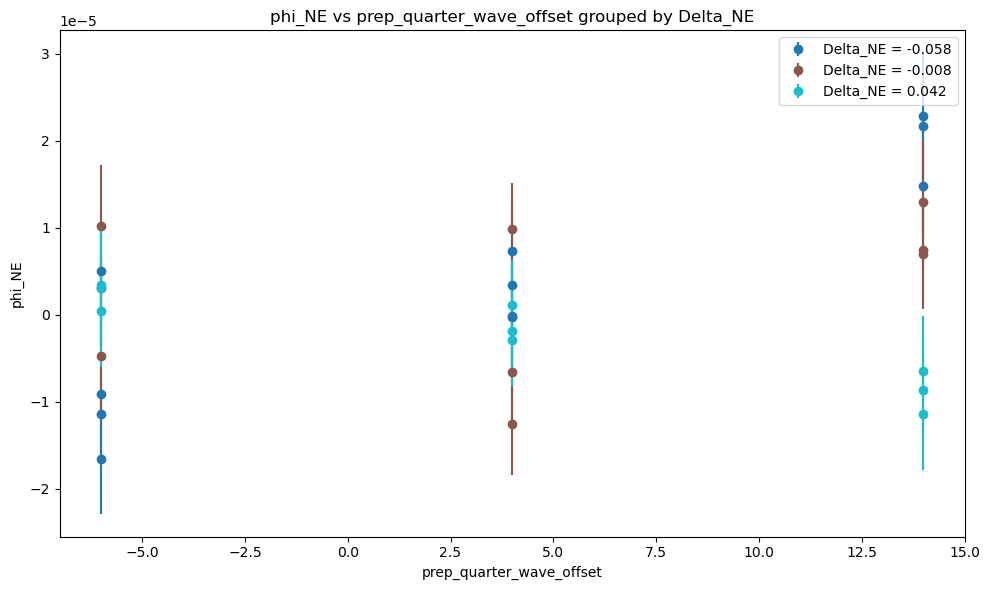

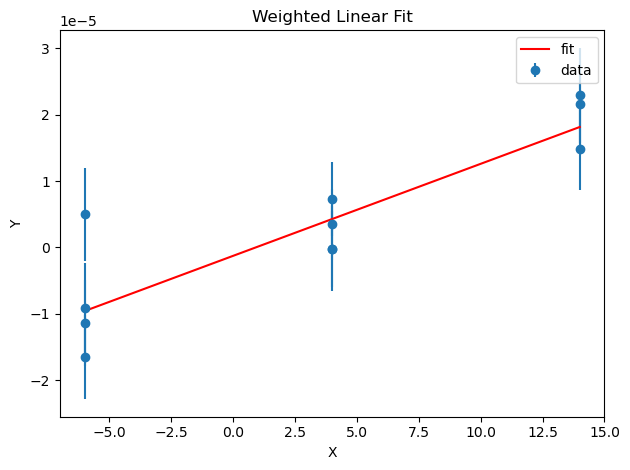

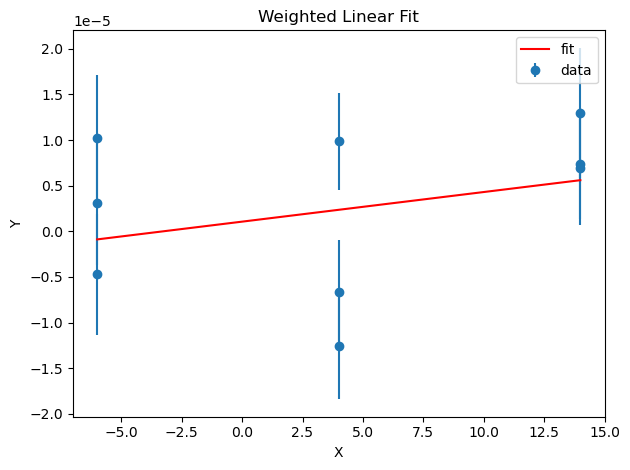

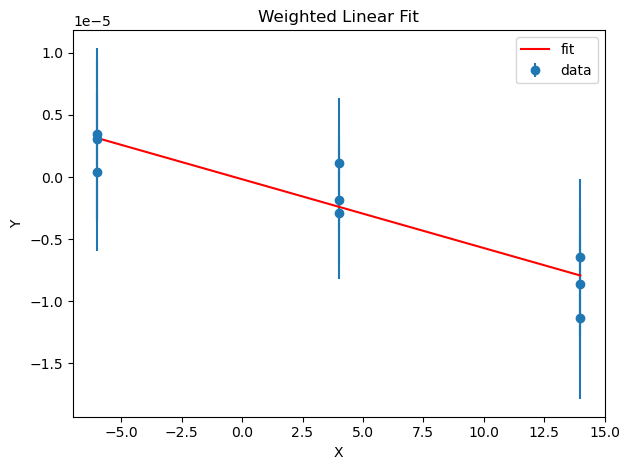


Weighted Linear Regression Results:

Delta_NE = -0.058
  beta0       = -0.000001 ± 0.000002
  beta1       = 0.000001 ± 0.000000
  R^2         = 0.791491
  chi2_red    = 0.900820

Delta_NE = -0.008
  beta0       = 0.000001 ± 0.000004
  beta1       = 0.000000 ± 0.000000
  R^2         = 0.085143
  chi2_red    = 2.226211

Delta_NE = 0.042
  beta0       = -0.000000 ± 0.000001
  beta1       = -0.000001 ± 0.000000
  R^2         = 0.816145
  chi2_red    = 0.142571



In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ===========================================================
# YOU DECIDE THESE VARIABLES
# ===========================================================
y = "phi_NE"                          # dependent variable
dy = "uncertainty_phi_NE"             # uncertainty on y
fit_against = "prep_quarter_wave_offset"   # x variable
master_parameter = "Delta_NE"    # grouping parameter
# ===========================================================


# Get unique parameter groups
groups = np.sort(df[master_parameter].unique())

# Color map for groups
colors = plt.cm.tab10(np.linspace(0, 1, len(groups)))

# Make the figure
fig, ax = plt.subplots(figsize=(10, 6))

fit_results = {}

for i, g in enumerate(groups):

    sub = df[df[master_parameter] == g]

    X = sub[fit_against].values
    Y = sub[y].values
    dY = sub[dy].values

    color = colors[i]

    # --- ERROR BAR PLOT ONLY ---
    ax.errorbar(
        X, Y, yerr=dY,
        fmt='o', markersize=6, color=color,
        label=f"{master_parameter} = {g}"
    )

    # --- DO WEIGHTED FIT ---
    res = generalized_linear_regression(X, Y, dY)
    fit_results[g] = res


# --- Plot formatting ---
ax.set_xlabel(fit_against)
ax.set_ylabel(y)
ax.set_title(f"{y} vs {fit_against} grouped by {master_parameter}")
ax.legend()
fig.tight_layout()

plt.show()


# ===========================================================
# PRINT FIT RESULTS
# ===========================================================
print("\nWeighted Linear Regression Results:\n")

for g in groups:
    r = fit_results[g]
    print(f"{master_parameter} = {g}")
    print(f"  beta0       = {r['beta0']:.6f} ± {r['sde_beta0']:.6f}")
    print(f"  beta1       = {r['beta1']:.6f} ± {r['sde_beta1']:.6f}")
    print(f"  R^2         = {r['R2']:.6f}")
    print(f"  chi2_red    = {r['chi2_red']:.6f}")
    print("")
